<div>
Olá, Alexandre!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto está muito bom e possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Aplicação adequada de algoritmos de agrupamento
- Uso adequado de gráficos e estatísticas descritivas

<br>
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
   
<br>
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Projeto Sprint 13 - Previsões e Predições


* Neste projeto vamos desenvolver uma estratégia que ajude a resolver o problema de rotatividade de clientes na rede de academias Model FItness. 
* O foco deste projeto será criar um modelo que faça predições sobre a rotatividade de clientes, também será feito um agrupamento dos clientes. 
* O projeto será composto por 5 partes, sendo elas:
* Primeira parte: Leitura dos dados e importação das bibliotecas que serão usadas.
* Segunda parte: Análise exploratória dos dados.
* Terceira parte: Construção de um modelo para predizer a rotatividade dos clientes da academia. 
* Quarte parte: Agrupamento de clientes.
* Quinta parte: Conclusão e recomendações básicas.
* Cada célula irá conter qual é seu objetivo, assim como qual abordagem foi usada para o mesmo.

## Parte 1: Leitura dos dados e Importação de bibliotecas

In [40]:
# Importando as bibliotecas usadas nesse projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
# Lendo os dados e armazenando no dataframe gym_churn
gym_churn= pd.read_csv('/datasets/gym_churn_us.csv')
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [42]:
# Vamos criar um loop para iterar sobre os nomes de cada coluna colocando tudo em letras minúsculas, conforme o estilo snake_case.
new_col_names= []

for old_name in gym_churn.columns:
    name_lowered= old_name.lower()
    new_col_names.append(name_lowered)

gym_churn.columns= new_col_names

In [43]:
# Aqui notamos que todos os nomes de colunas estão em letras minúsculas
gym_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [44]:
# Verificando os tipos dos dados
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

* Na célula acima notamos que não existem valores ausentes no data frame e também os tipos dos dados estão corretos, dessa forma, não existe necessidade de mudar nada.  

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente
- Os imports foram feitos em células separadas
- O método `head()` foi usado para exibir uma amostra do conjunto de dados
- O método `info()` foi utilizado corretamente
- Os nomes das colunas foram convertidos para `lowercase`
- Os dados duplicados foram estudados
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você precisa fazer um estudo sobre valores ausentes e duplicados e apresentar as suas observações
</div>

In [45]:
# Usando o método isna para verificar se existem valores ausentes. 
gym_churn.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [46]:
# Usando duplicated para verificar se existem valores duplicados no data frame. 
gym_churn.duplicated().sum()

0

* Não existem valores ausentes no data frame. 
* Não existem valores duplicados no data frame. 

## Parte 2: Análise exploratória dos dados
* Nesta parte vamos realizar uma análise exploratória dos dados, vamos estudar a média e o desvio padrão.
* Também será analisada a média para os grupos que ficaram e para os grupos que saíram. 
* Ademais serão criados histogramas de barra e distribuição para os clientes que saíram e ficaram, e também uma matriz de correlação. 


In [47]:
# Estudando a média e o desvio padrão com o método describe()
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


* Na parte 1 do projeto já verificamos que não existem valores ausentes.
* Existem várias colunas que estão em linguagem binária, então não faz sentido olhar para métricas como média e desvio padrão. 
* Contudo, nas colunas como age, notamos que a idade média dos usuários é de 29 anos aproximadamente, e que o mais jovem da amostra tem 18 anos e o mais velho 41 anos. 
* Notamos que a coluna lifetime, que representa o tempo em meses desde a primeira vez que o cliente foi à academia tem a média de 3,72 meses, e o máximo de 31 meses.
* A coluna contract_period nos diz que a média de clientes fecha um contrato de aproximadamente 5 meses. 

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As estatísticas foram calculadas e as conclusões foram apresentadas. Como sugestão, aqui você poderia filtrar clientes ativos e os que cancelaram para comparar as estatísticas descritivas de cada grupo.
</div>

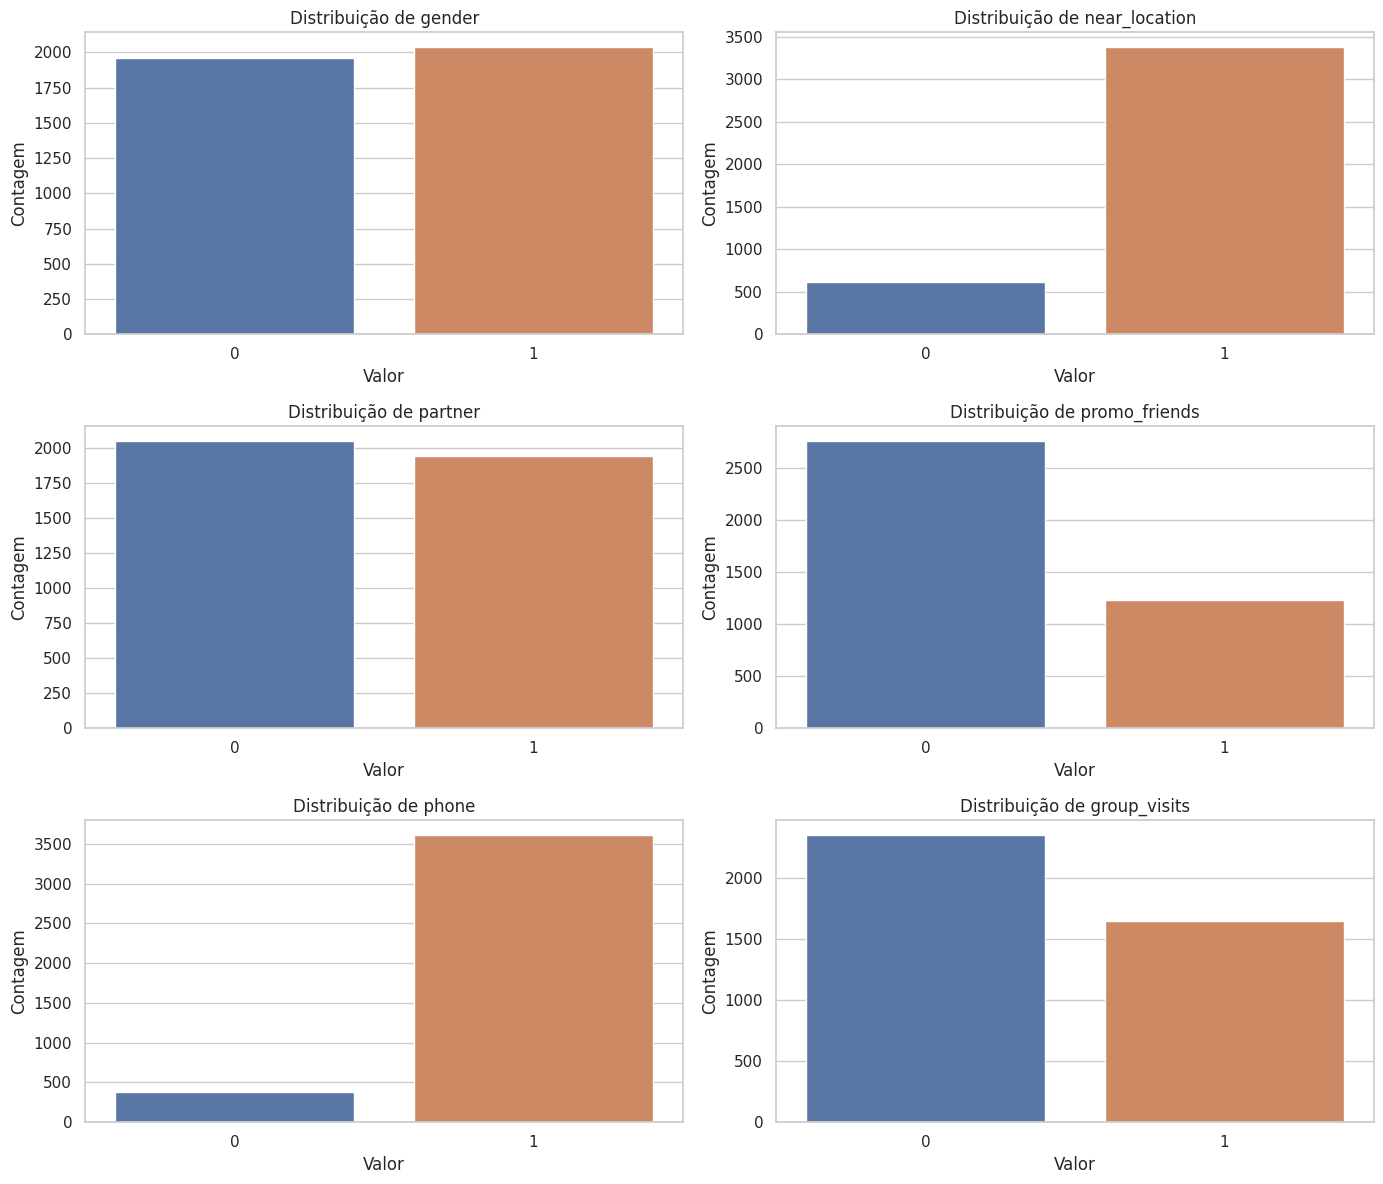

In [48]:
# Construindo distribuições para análise da proporção das colunas que contêm valores em linguagem binária.
# 0 é para "não" e 1 para "sim". 
# No quesito gênero, temos 1 para masculino e 0 para feminino 


# Estas são as colunas binárias
binary_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando gráficos de barras para as colunas binárias
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

for ax, column in zip(axs.flatten(), binary_columns):  # Excluindo churn da visualização
    sns.countplot(x=column, data=gym_churn, ax=ax)
    ax.set_title(f'Distribuição de {column}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Contagem')

plt.tight_layout()
plt.show()



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante comparou a distribuição das variáveis para as classes de `churn`.
</div>

In [49]:
# Observando a média dos valores médios das características nos dois grupos, os que saíram e os que ficaram.
# Criei um data frame com os clientes que ficaram.
group_stay= gym_churn[gym_churn['churn'] == 0]
group_stay.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


In [50]:
# Observando a média dos valores médios das características nos dois grupos, os que saíram e os que ficaram.
# Criei um data frame com os clientes que saíram.
group_left= gym_churn[gym_churn['churn'] == 1]
group_left.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


* Quando observamos a média características médias do grupo dos clientes que saíram e dos que ficaram, notamos que existe uma diferença significativa na 'Avg_class_frequency_current_month' que é a  frequência média de visitas por semana durante o mês corrente. O grupo que ficou tem o dobro da média do grupo que saiu. 
* Outro detalhe é o tempo de vida, os clientes que saíram tem quase 5 vezes a menos do que o tempo de vida dos clientes que ficaram. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Perfeito! Aqui é interessante fazer essa análise segmentada para entender características únicas de cada grupo.
</div>

In [51]:
group_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 7 to 3996
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             1061 non-null   int64  
 1   near_location                      1061 non-null   int64  
 2   partner                            1061 non-null   int64  
 3   promo_friends                      1061 non-null   int64  
 4   phone                              1061 non-null   int64  
 5   contract_period                    1061 non-null   int64  
 6   group_visits                       1061 non-null   int64  
 7   age                                1061 non-null   int64  
 8   avg_additional_charges_total       1061 non-null   float64
 9   month_to_end_contract              1061 non-null   float64
 10  lifetime                           1061 non-null   int64  
 11  avg_class_frequency_total          1061 non-null   float

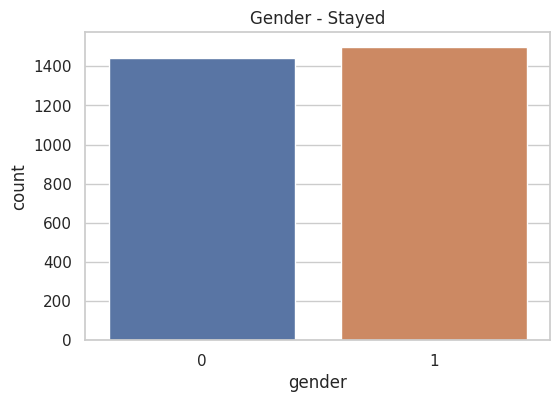

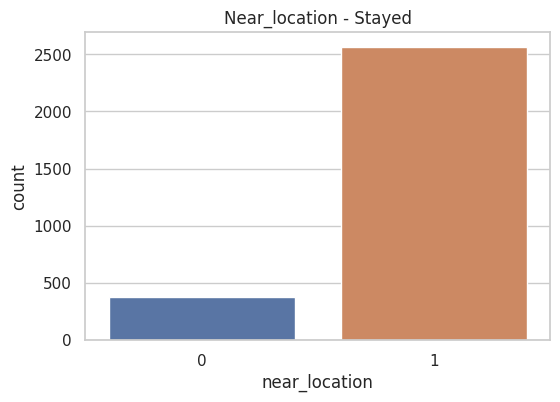

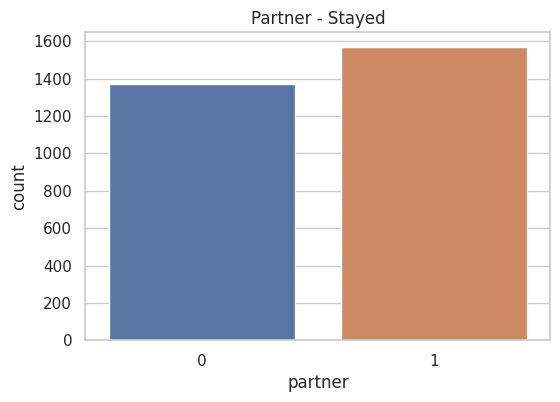

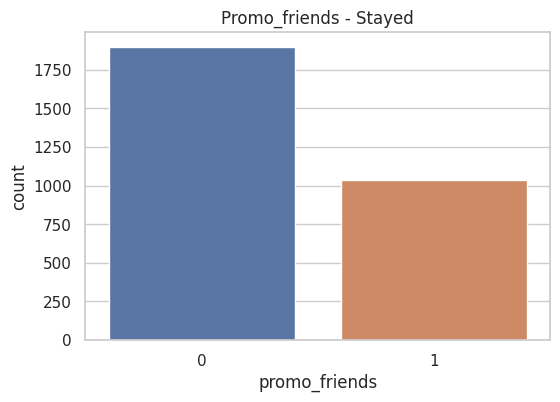

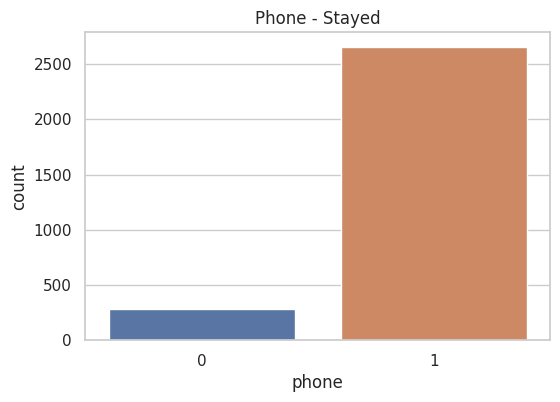

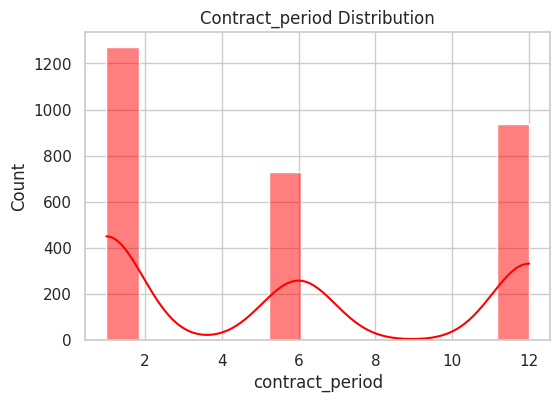

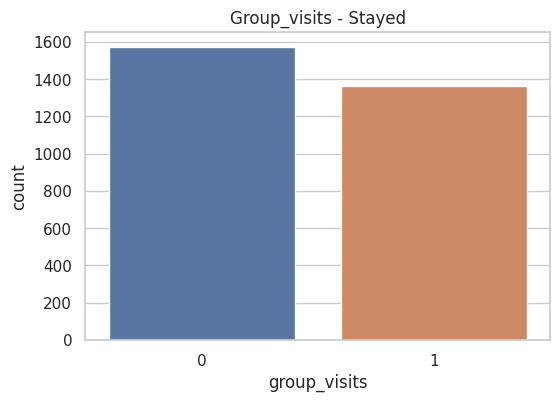

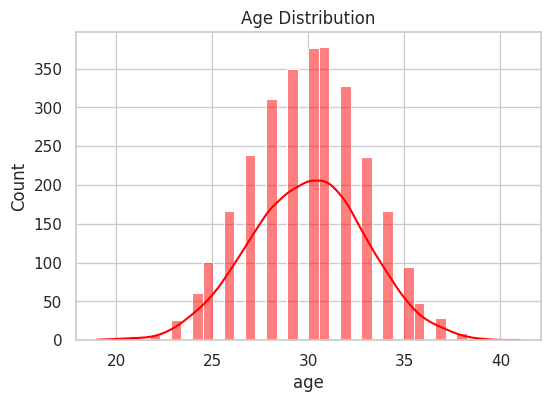

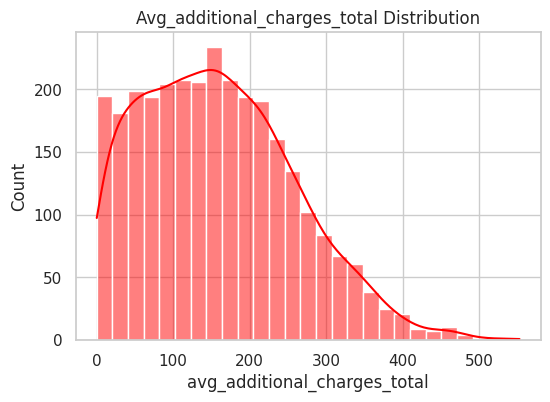

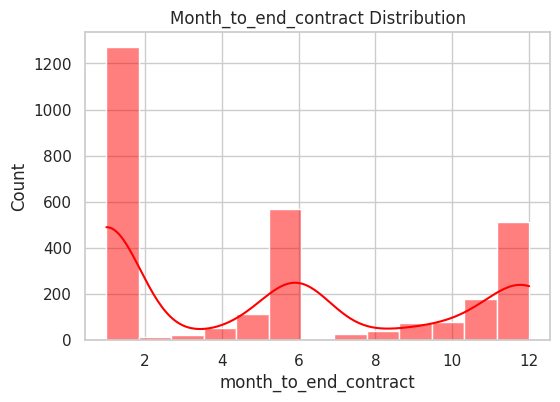

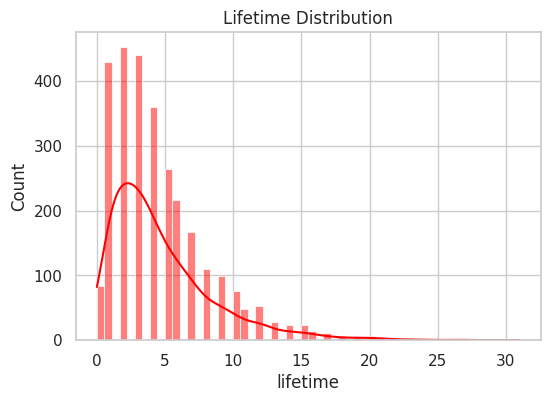

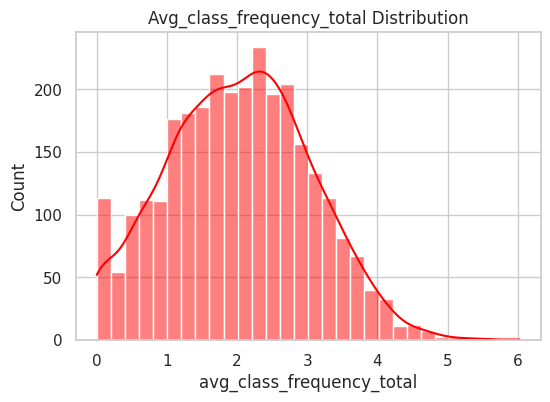

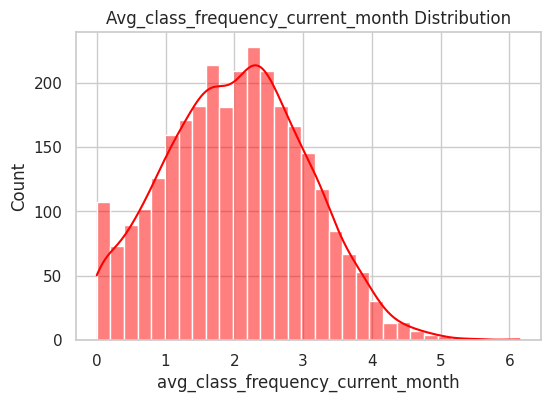

In [52]:
# Nesta célula iremos criar gráficos de barras para variáveis binárias, e distribuições para as variáveis não binárias.
# Usaremos o data frame com clientes que ficaram
# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Características que vamos visualizar
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 
            'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 
            'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
            'avg_class_frequency_current_month']

for feature in features:
    plt.figure(figsize=(6, 4))

    if group_stay[feature].between(0, 1).all():
        # Gráfico de barra para variáveis com valores entre 0 e 1
        sns.countplot(data=group_stay, x=feature)
        plt.title(f'{feature.capitalize()} - Stayed')
    else:
        # Histograma para variáveis contínuas
        sns.histplot(group_stay[feature], kde=True, color='red')
        plt.title(f'{feature.capitalize()} Distribution')

    plt.show()


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante comparou a distribuição das variáveis binárias para as classes de `churn`. Dica: plote apenas dois subgráficos por coluna para facilitar a interpretação dos dados.
</div>

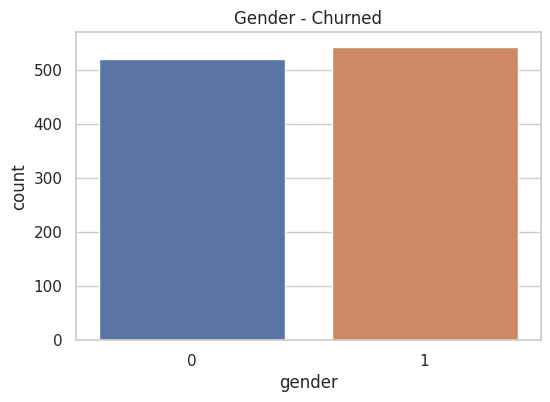

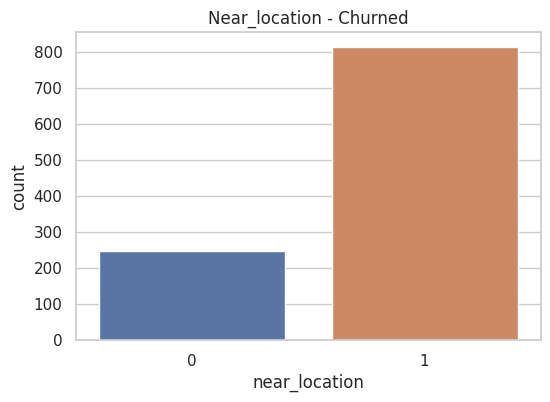

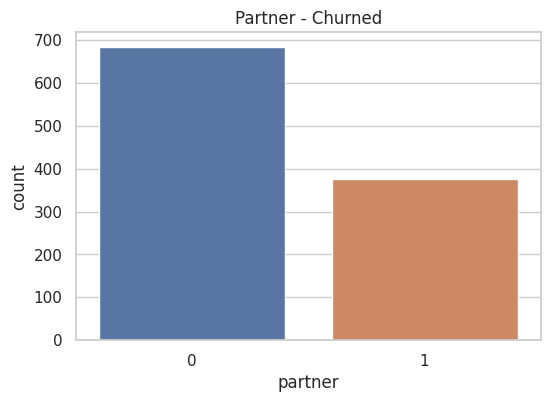

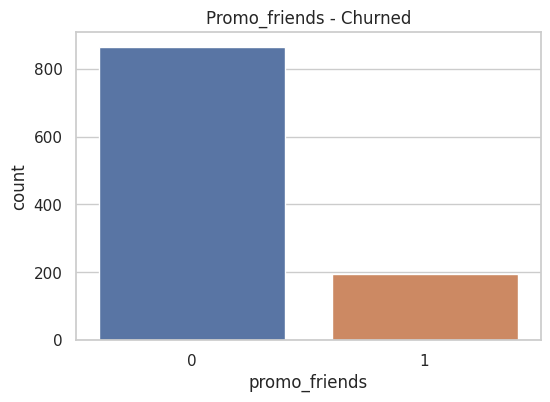

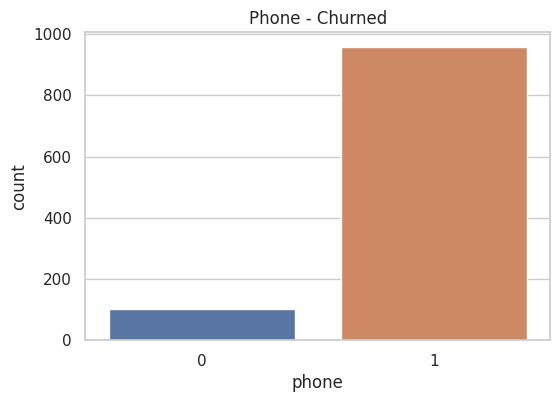

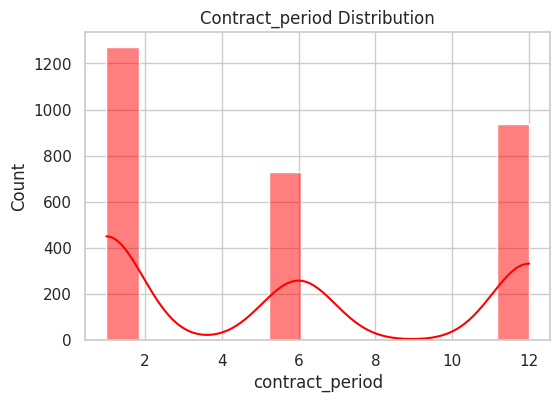

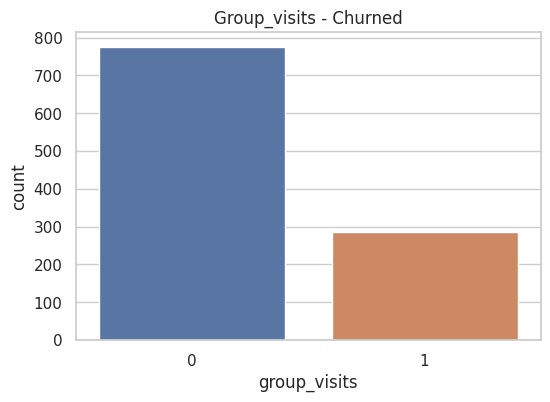

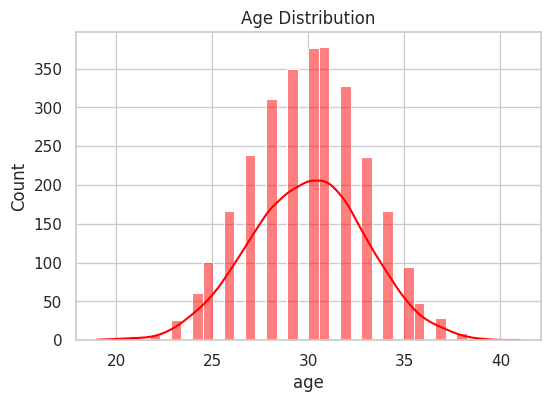

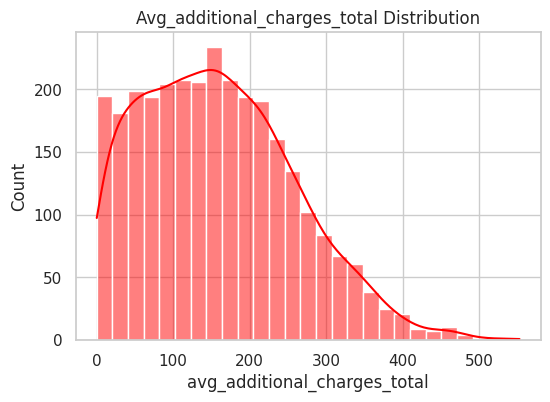

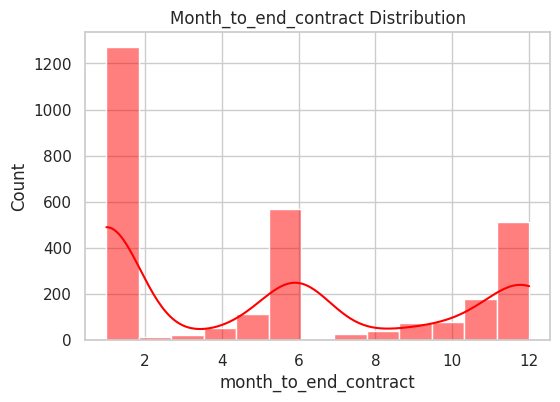

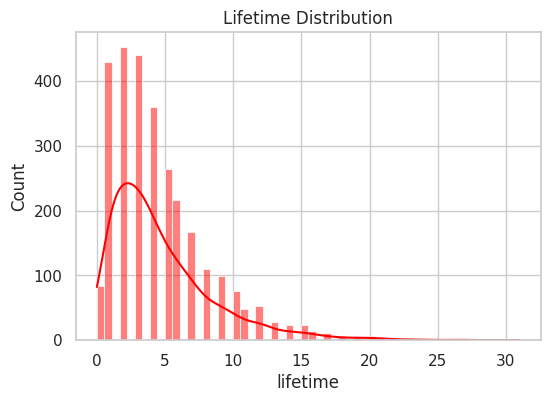

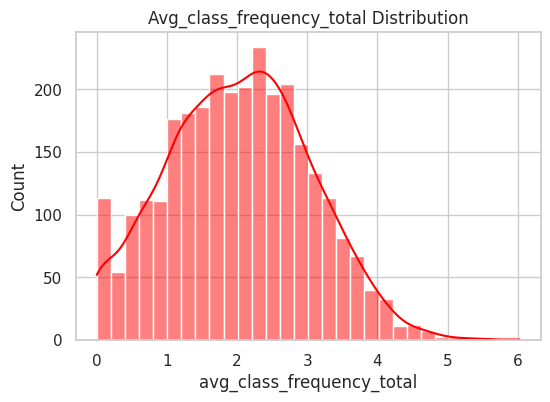

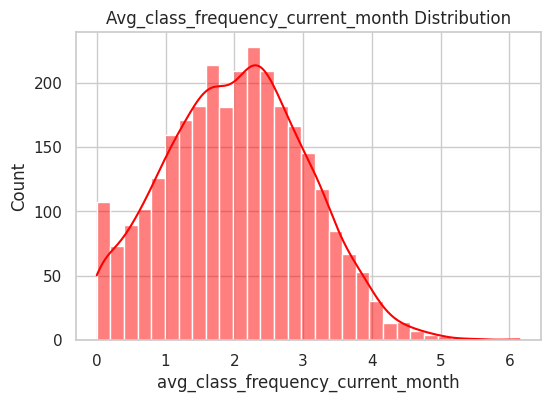

In [53]:
# Nesta célula iremos criar gráficos de barras para variáveis binárias, e distribuições para as variáveis não binárias.
# Usaremos o data frame com clientes que saíram
# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Características que vamos visualizar
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 
            'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 
            'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
            'avg_class_frequency_current_month']

for feature in features:
    plt.figure(figsize=(6, 4))

    if group_left[feature].between(0, 1).all():
        # Gráfico de barra para variáveis com valores entre 0 e 1
        sns.countplot(data=group_left, x=feature)
        plt.title(f'{feature.capitalize()} - Churned')
    else:
        # Histograma para variáveis contínuas
        sns.histplot(group_stay[feature], kde=True, color='red')
        plt.title(f'{feature.capitalize()} Distribution')

    plt.show()


* Nas duas células acima, poderia ter feito cada gráfico para cada característica separadamente, contudo, busquei uma alternativa para que em um código somente, gerasse todos os gráficos. 
* Notamos algumas diferenças nos gráficos, por exemplo, dos clientes que saíram, a maioria não era funcionário de uma companhia parceira.
* Já a característica promo_friends não teve tanta alteração sobre as pessoas que saíram e ficaram. 
* No período de contrato, já se pode notar uma diferença entre os grupos. 

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante comparou a distribuição das variáveis para as classes de `churn`. Dica: Esse código é muito parecido com os anteriores. Considere criar uma função para reuso de funcionalidade sempre que possível.
</div>

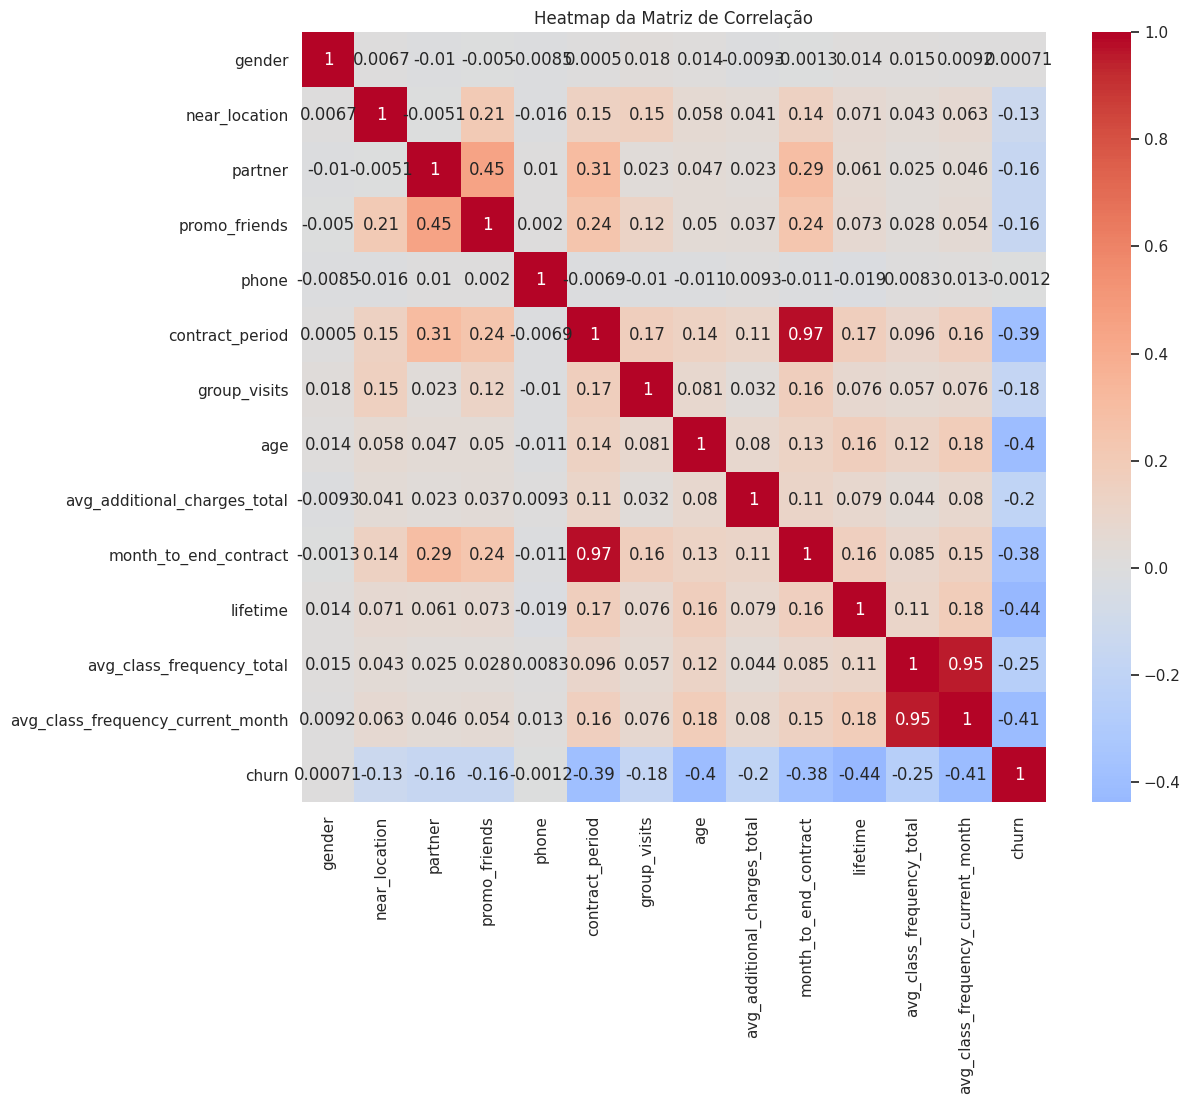

In [54]:
# Construindo uma matriz de correlação entre as características
# Valores próximos de 1 indicam correlação positiva entre as características, valores próximos de 0 indicam 
# ausência de correlação ou correlação fraca, e também valores próximos de -1 indicam correlação negativa. 
corr= gym_churn.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A correlação entre os atributos numéricos foi calulada. Aqui você poderia plotar um heatmap a partir da matriz acima. Sugestão:
    
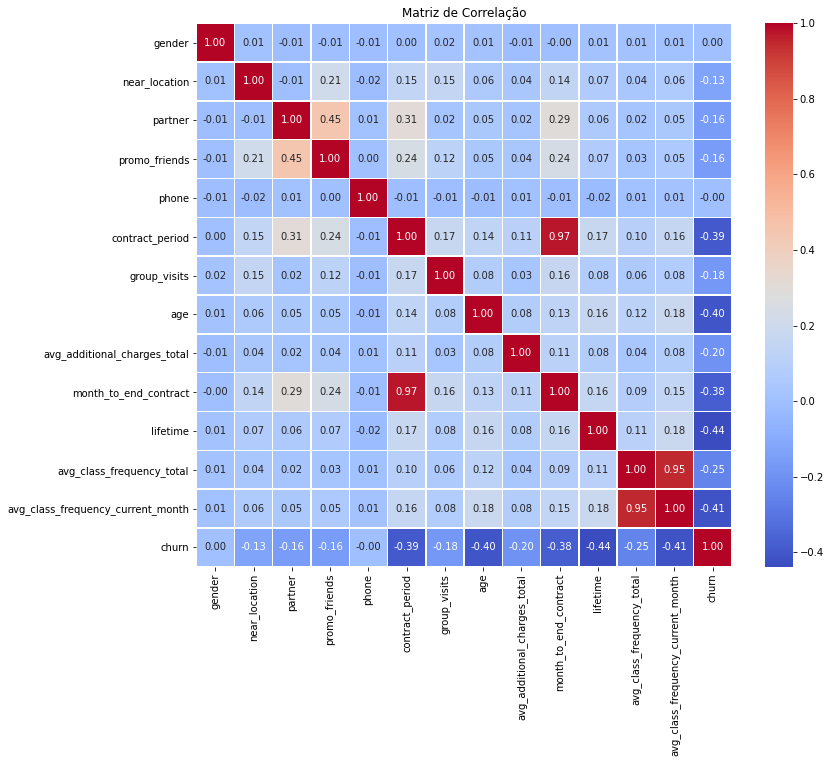
</div>

## Parte 3: Construindo um modelo para predizer a rotatividade de clientes
* Nesta parte do projeto vamos construir um modelo de classificação binária para clientes onde a variável objetivo é a saída de usuários do próximo mês.
* Será usado regressão logística para esse tipo de classificação.

In [81]:
# Nesta célula vamos criar uma matriz de características e um vetor com a variável objetivo
# Também nesta célula vamos treinar o modelo com o algoritmo de regressão logística

X= gym_churn.drop('churn', axis = 1) # Criando a matriz de características
y= gym_churn['churn'] # criando o vetor com a variável objetivo

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# dividindo os dados em treinos e testes
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# definindo o algoritmo do modelo
model = LogisticRegression()

# treinando o modelo
model.fit(X_train, y_train)

# usando o modelo treinado para fazer previsões
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Para o modelo de Regressão Logística, você precisa normalizar os dados, caso eles estejam em escalas diferentes:
    
```python
    
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
    
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
...
```
</s>
</div>

In [82]:
# Treinando o modelo com o algoritmo de árvore aleatória

# Criando o modelo de Árvore de Decisão
random_forest_model = RandomForestClassifier()

# Treinando o modelo de Árvore de Decisão
random_forest_model.fit(X_train, y_train)

# Fazendo previsões com o modelo de Árvore de Decisão
rf_predictions = random_forest_model.predict(X_test)
rf_predictions


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,

In [83]:
# Comparando as métricas acurácia, precisão e sensibilidade para ambos os modelos usando dados de validação

# Calculando as métricas para o modelo de Regressão Logística
accuracy_lr = accuracy_score(y_test, predictions)
precision_lr = precision_score(y_test, predictions)
recall_lr = recall_score(y_test, predictions)

# Calculando as métricas para o modelo de Árvore de Decisão
accuracy_rf = accuracy_score(y_test, rf_predictions)
precision_rf = precision_score(y_test, rf_predictions)
recall_rf = recall_score(y_test, rf_predictions)

# Exibindo as métricas
print("Métricas para o modelo de Regressão Logística:")
print(f"Acurácia: {accuracy_lr}")
print(f"Precisão: {precision_lr}")
print(f"Sensibilidade: {recall_lr}")

print("\nMétricas para o modelo de Árvore de Decisão:")
print(f"Acurácia: {accuracy_rf}")
print(f"Precisão: {precision_rf}")
print(f"Sensibilidade: {recall_rf}")


Métricas para o modelo de Regressão Logística:
Acurácia: 0.99625
Precisão: 1.0
Sensibilidade: 0.9851485148514851

Métricas para o modelo de Árvore de Decisão:
Acurácia: 0.99375
Precisão: 1.0
Sensibilidade: 0.9752475247524752


### Interpretando os resultados dos dois modelos:
* Acurácia mede a proporção de previsões corretas feitas pelo modelo. Um valor mais próximo de 1 indica um modelo mais preciso. Nesse caso, a Regressão Logística teve uma acurácia ligeiramente melhor do que a Árvore de Decisão. 
* Precisão mede a proporção de previsões positivas que foram realmente corretas (ou seja, a proporção de verdadeiros positivos em relação ao total de previsões positivas). Uma precisão maior indica que o modelo faz menos falsos positivos. Nesse caso, a Regressão Logística teve um desempenho igual a Árvore de Decisão.
* Sensibilidade ou recall mede a proporção de verdadeiros positivos que foram corretamente identificados pelo modelo (ou seja, a proporção de verdadeiros positivos em relação ao total de positivos reais). Uma sensibilidade maior indica que o modelo faz menos falsos negativos. Aqui, a Regressão Logística também teve um desempenho melhor do que a  Árvore de Decisão.
* Com base nessas métricas, podemos dizer que o modelo de Regressão Logística teve um desempenho um pouco do que o modelo de Árvore de Decisão.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os modelos Regressão Logística e Random Forest foram utilizados
- As métricas de performance dos modelos foram calculadas
- As interpretações foram apresentadas
- A acurácia de pelo menos `0.78` foi alcançada

</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Vamos revisar essa seção após os ajustes na normalização dos dados do modelo de Regressão Logística</s>

</div>

## Parte 4: Criando agrupamentos de Clientes
* Nesta parte do projeto vamos padronizar os dados e construir uma matriz de distâncias e posteriormente um dendograma. 
* Vamos treinar o modelo com o algoritmo K-means e prever o agrupamento de clientes. 
* Serão feitas distribuições de características para agrupamentos. 
* Por fim, vamos calcular a taxa de rotatividade para cada agrupamento. 

In [58]:
# Padronizando os dados

# criando um objeto de classe normalizador
sc = StandardScaler() 

# padronizando o conjunto de dados
X_sc = sc.fit_transform(gym_churn) 
X_sc

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -1.91191971,
        -1.67847198, -0.6008387 ],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.04517569,
         0.1360137 , -0.6008387 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.02049263,
        -0.02901851, -0.6008387 ],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ...,  0.93313947,
         1.01103141, -0.6008387 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.25604937,
        -0.16225246, -0.6008387 ],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.79947418,
        -0.69509885, -0.6008387 ]])

In [59]:
# Usando KMeans para criar os grupos no data frame
km = KMeans(n_clusters = 5) # definindo o número de agrupamentos como 5
labels = km.fit_predict(X_sc) # aplicando o algoritmo os dados e formando um vetor de agrupamento
labels

array([2, 3, 1, ..., 3, 3, 2], dtype=int32)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O algoritmo `KMeans` foi utilizado para agrupar os usuários
</div>

In [60]:
# Usando a função Linkage para criar a  matriz de distância
linked = linkage(X_sc, method = 'ward')
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99400000e+03, 8.72762251e+01, 1.84900000e+03],
       [7.99000000e+03, 7.99600000e+03, 9.11839820e+01, 2.71900000e+03],
       [7.99500000e+03, 7.99700000e+03, 1.13452431e+02, 4.00000000e+03]])

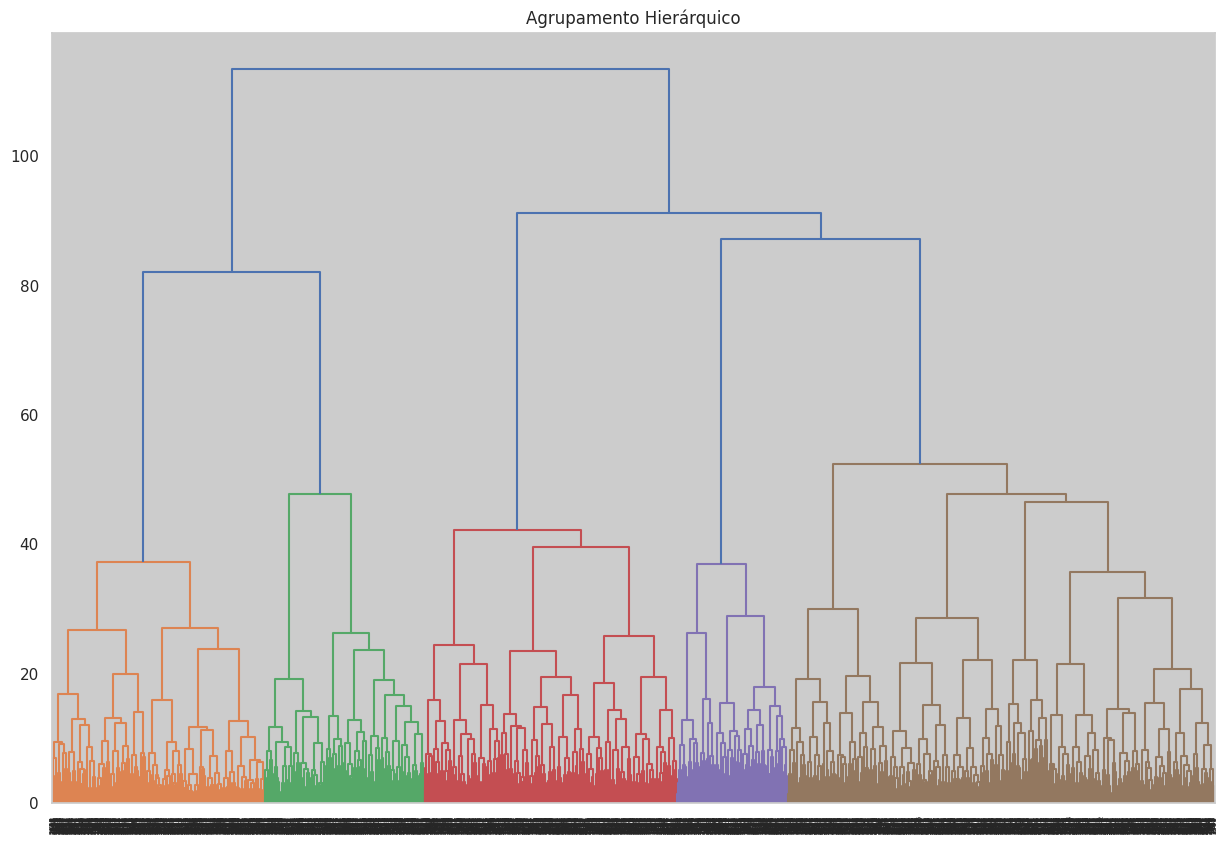

In [61]:
# Gerando um dendograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupamento Hierárquico')
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram padronizados
- O agrupamento hierárquico foi executado
- O dendograma foi criado
- A função `linkage()` foi utilizada para construir a matriz de distâncias
</div>

In [62]:
# Inserindo os grupos no data frame original
gym_churn['grupo']= labels
gym_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,grupo
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,2
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1


In [77]:
# Calculando a taxa de rotatividade para cada agrupamento
gym_churn.groupby('grupo')['churn'].mean()

grupo
0    0.007084
1    0.001160
2    0.261780
3    0.015496
4    0.997875
Name: churn, dtype: float64

* Na célula acima, notamos quais grupos tem a maior e menor taxa de rotatividade, notamos que o grupo 0 e o grupo 1 tem valores de rotatividade próximos de zero. 
* O grupo 3 também tem valores muito baixos de rotatividade. 
* O grupo 2 tem 26% de desistências. 
* Contudo, o destaque fica para o grupo número 4, que tem quase 100%  de desistência. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A rotatividade média foi calculada por grupo (`cluster`)
</div>

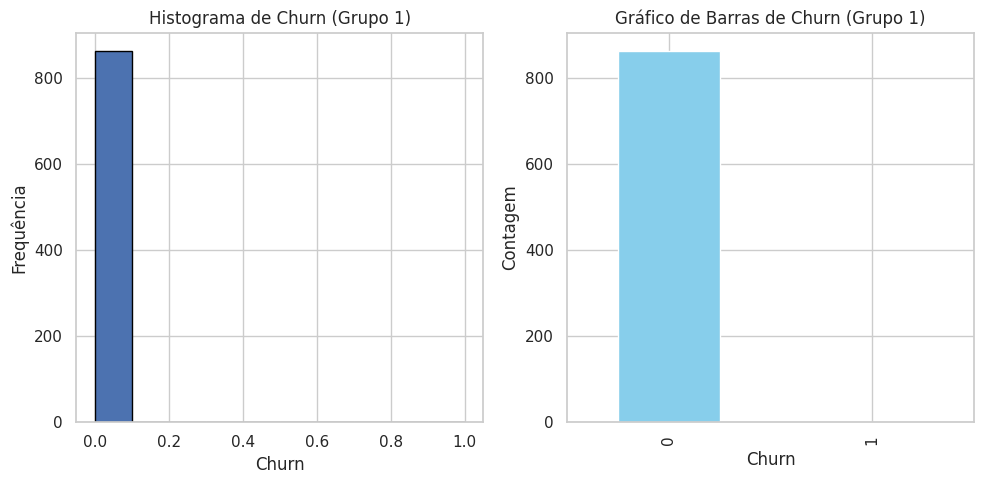

In [84]:
# Criando distribuições utilizando características para os grupos com maior e mmenor rotatividade. 

# Filtrando pelo grupo 1
df_group_1 = gym_churn[gym_churn['grupo'] == 1]


# Plotando histograma de 'churn' para o grupo 1
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_1['churn'], bins=10, edgecolor='black')
plt.title('Histograma de Churn (Grupo 1)')
plt.xlabel('Churn')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_1['churn'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de Churn (Grupo 1)')
plt.xlabel('Churn')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

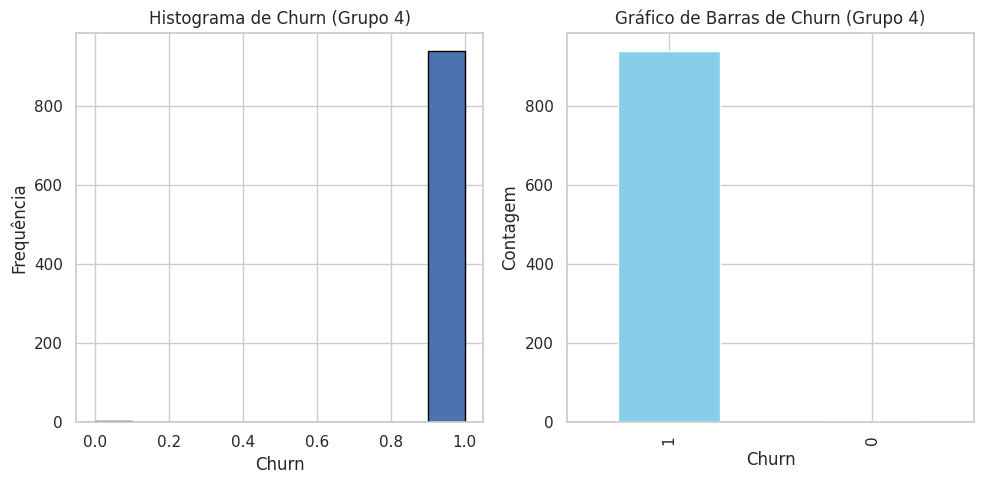

In [65]:
# Filtrando pelo grupo 4
df_group_4 = gym_churn[gym_churn['grupo'] == 4]


# Plotando histograma de 'churn' para o grupo 4
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_4['churn'], bins=10, edgecolor='black')
plt.title('Histograma de Churn (Grupo 4)')
plt.xlabel('Churn')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_4['churn'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de Churn (Grupo 4)')
plt.xlabel('Churn')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

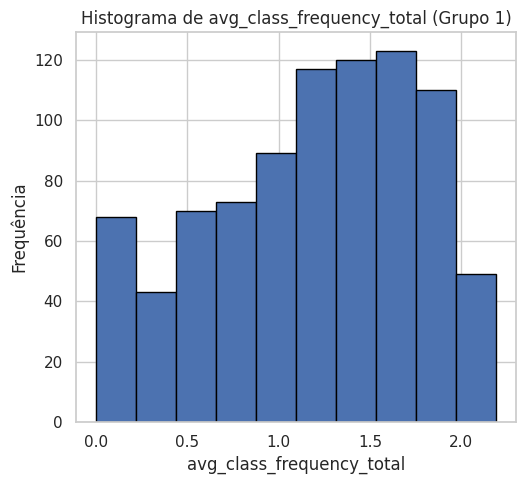

In [66]:
# Faremos as mesmas plotagens agora para a característica "avg_class_frequency_total"

# Plotando histograma de 'avg_class_frequency_total' para o grupo 1
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_1['avg_class_frequency_total'], bins=10, edgecolor='black')
plt.title('Histograma de avg_class_frequency_total (Grupo 1)')
plt.xlabel('avg_class_frequency_total')
plt.ylabel('Frequência')


plt.tight_layout()
plt.show()

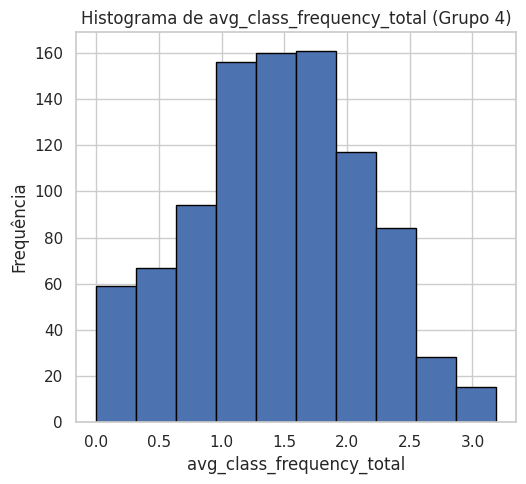

In [67]:
# Plotando histograma de 'avg_class_frequency_total' para o grupo 4
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_4['avg_class_frequency_total'], bins=10, edgecolor='black')
plt.title('Histograma de avg_class_frequency_total (Grupo 4)')
plt.xlabel('avg_class_frequency_total')
plt.ylabel('Frequência')


plt.tight_layout()
plt.show()

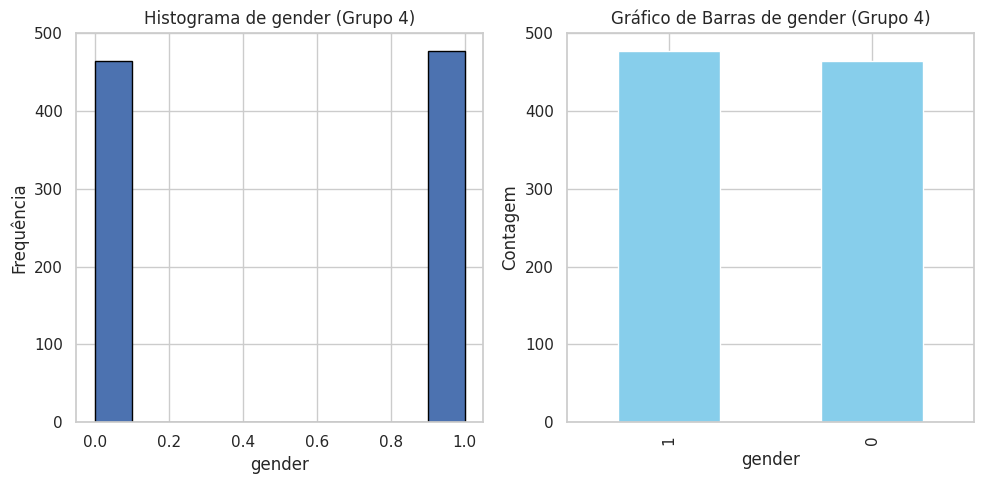

In [68]:
# Filtrando pelo grupo 4
df_group_4 = gym_churn[gym_churn['grupo'] == 4]


# Plotando histograma de 'gender' para o grupo 4
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_4['gender'], bins=10, edgecolor='black')
plt.title('Histograma de gender (Grupo 4)')
plt.xlabel('gender')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_4['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de gender (Grupo 4)')
plt.xlabel('gender')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

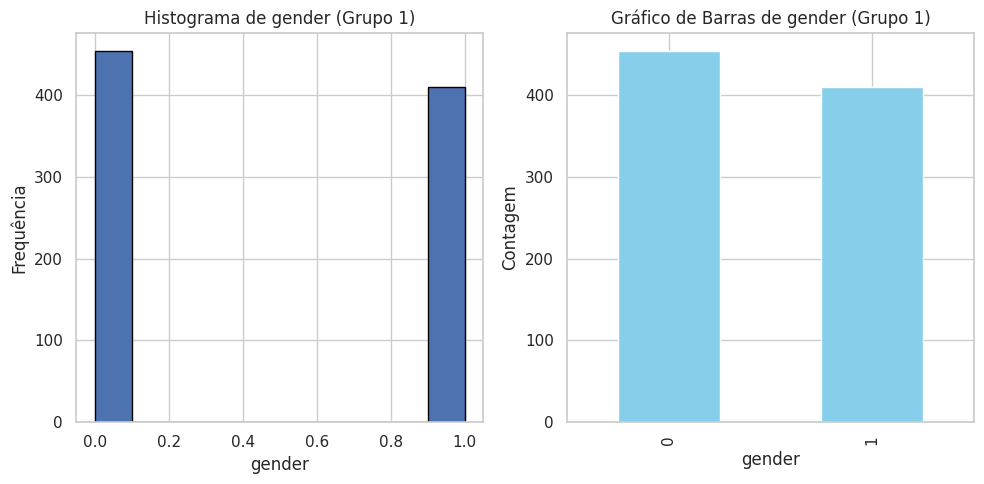

In [69]:
# Distribuições da característica gender para o grupo 1

# Plotando histograma de 'gender' para o grupo 1
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_1['gender'], bins=10, edgecolor='black')
plt.title('Histograma de gender (Grupo 1)')
plt.xlabel('gender')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_1['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de gender (Grupo 1)')
plt.xlabel('gender')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [70]:
gym_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,grupo
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,2
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1


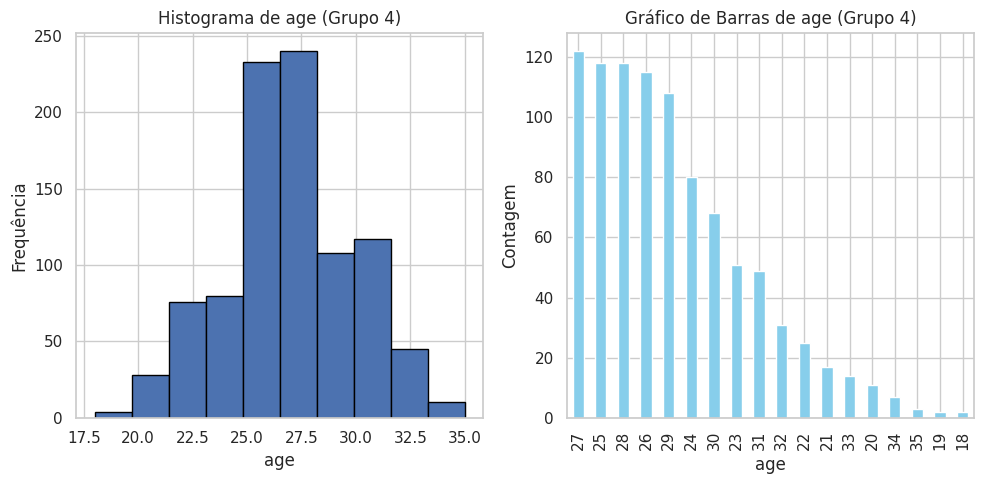

In [88]:
# Distribuições para a característica "age"
# Filtrando pelo grupo 4
df_group_4 = gym_churn[gym_churn['grupo'] == 4]


# Plotando histograma de 'age' para o grupo 4
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_4['age'], bins=10, edgecolor='black')
plt.title('Histograma de age (Grupo 4)')
plt.xlabel('age')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_4['age'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de age (Grupo 4)')
plt.xlabel('age')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

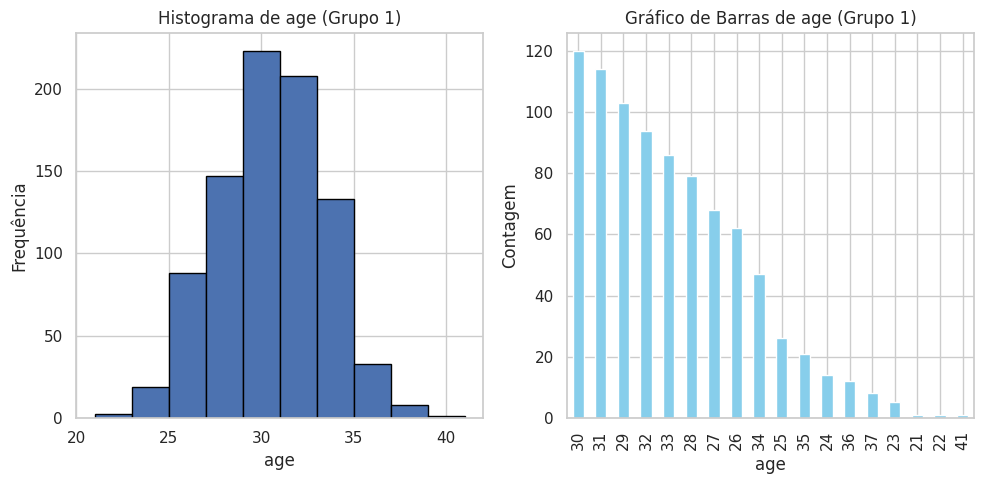

In [95]:
# Distribuições para a característica "age"
# Filtrando pelo grupo 1
df_group_1 = gym_churn[gym_churn['grupo'] == 1]


# Plotando histograma de 'age' para o grupo 1
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_1['age'], bins=10, edgecolor='black')
plt.title('Histograma de age (Grupo 1)')
plt.xlabel('age')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_1['age'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de age (Grupo 1)')
plt.xlabel('age')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

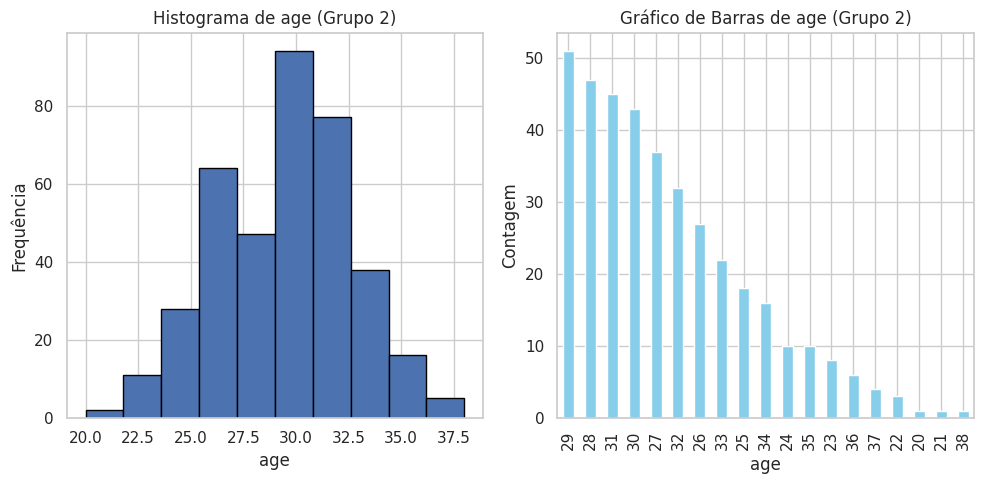

In [90]:
# Distribuições para a característica "age"
# Filtrando pelo grupo 2
df_group_2 = gym_churn[gym_churn['grupo'] == 2]


# Plotando histograma de 'age' para o grupo 2
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_2['age'], bins=10, edgecolor='black')
plt.title('Histograma de age (Grupo 2)')
plt.xlabel('age')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_2['age'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de age (Grupo 2)')
plt.xlabel('age')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

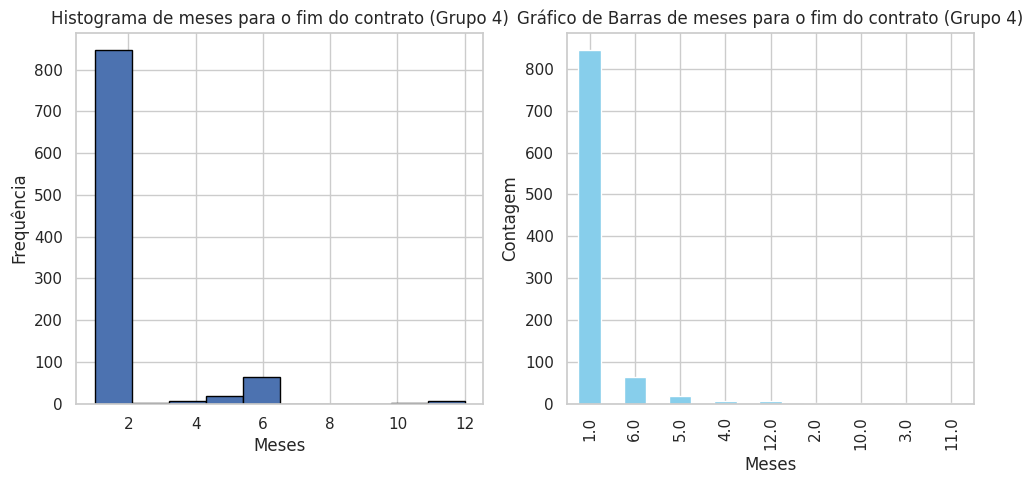

In [92]:
# Distribuições para a característica month_to_end_contract


# Plotando histograma de 'age' para o grupo 4
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_4['month_to_end_contract'], bins=10, edgecolor='black')
plt.title('Histograma de meses para o fim do contrato (Grupo 4)')
plt.xlabel('Meses')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_4['month_to_end_contract'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de meses para o fim do contrato (Grupo 4)')
plt.xlabel('Meses')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

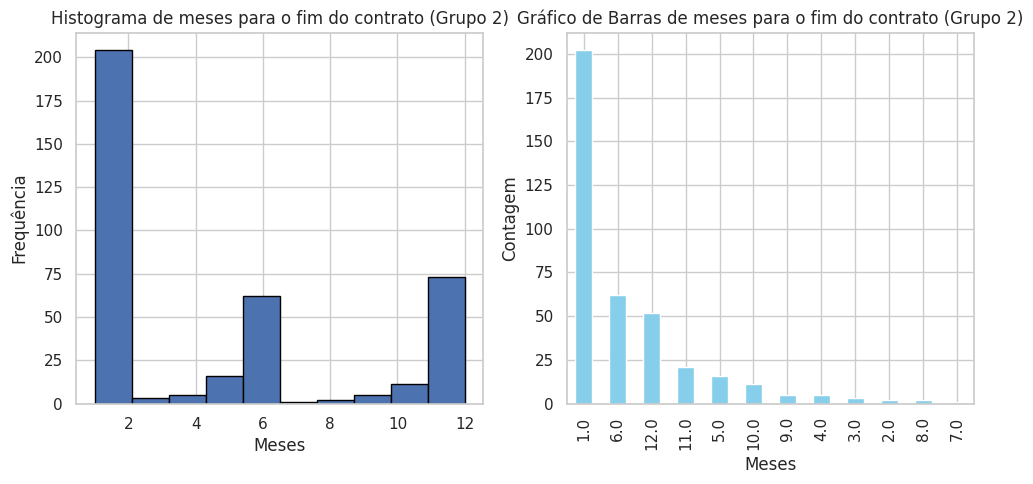

In [93]:
# Distribuições para a característica month_to_end_contract


# Plotando histograma de 'age' para o grupo 2
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_2['month_to_end_contract'], bins=10, edgecolor='black')
plt.title('Histograma de meses para o fim do contrato (Grupo 2)')
plt.xlabel('Meses')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_2['month_to_end_contract'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de meses para o fim do contrato (Grupo 2)')
plt.xlabel('Meses')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

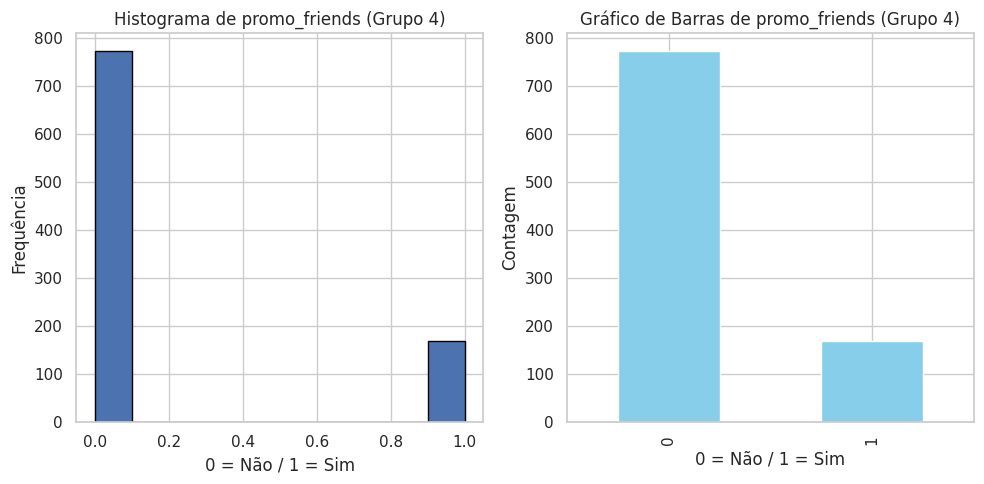

In [98]:
#promo_friends

# Distribuições para a característica promo_friends

# Plotando histograma de 'age' para o grupo 4
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_4['promo_friends'], bins=10, edgecolor='black')
plt.title('Histograma de promo_friends (Grupo 4)')
plt.xlabel('0 = Não / 1 = Sim')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_4['promo_friends'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de Barras de promo_friends (Grupo 4)')
plt.xlabel('0 = Não / 1 = Sim')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

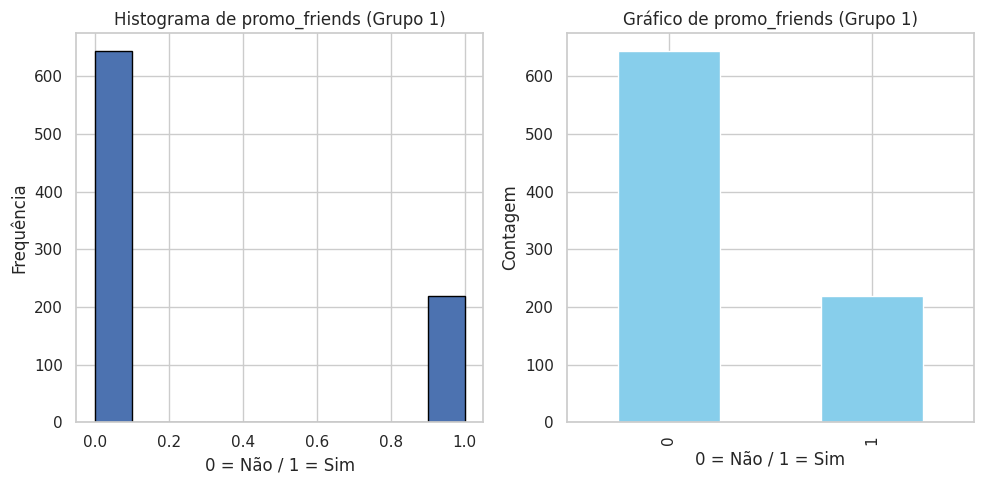

In [99]:
# Distribuições para a característica "promo_friends"
# Filtrando pelo grupo 1
df_group_1 = gym_churn[gym_churn['grupo'] == 1]


# Plotando histograma de 'age' para o grupo 
plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_group_1['promo_friends'], bins=10, edgecolor='black')
plt.title('Histograma de promo_friends (Grupo 1)')
plt.xlabel('0 = Não / 1 = Sim')
plt.ylabel('Frequência')

# Gráfico de Barras
plt.subplot(1, 2, 2)
df_group_1['promo_friends'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gráfico de promo_friends (Grupo 1)')
plt.xlabel('0 = Não / 1 = Sim')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

* Notamos que não existe uma diferença significativa nos gêneros do grupo 4, que tem a maior rotatividade e nem no grupo 1, que tem menor rotatividade.
* Notamos que no grupo 4, que tem a maior taxa de desistência, são jovens entre 25 e 29 anos. 
* O grupo mais fiel, que é o 0, tem a maioria de pessoas entre 30 e 35 anos.
* O grupo 2 tem a maioria dos que desistiram entre 27 e 30 anos. 
* Notamos que a maioria das pessoas desistentes do grupo 4 e do grupo 2, saem faltando 1 mês para terminar seu contrato. 
* Notamos que tanto no grupo mais desistente quanto no grupo menos desistente, a maioria das pessoas não veio de uma indicação de amigo. 

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Aqui você precisa apresentar um apanhado geral das características dos grupos analisados. Sugestão: interprete os gráficos gerados e procure analisar as principais características de cada grupo. Você apresenta sua conclusão final mais abaixo, mas o interessante é aqui nessa etapa você apresentar a interpretação dos grupos/clusters.</s>
</div>

## Conclusão:

* Ao final do projeto, podemos concluir que o grupo que tem menor rotatividade é o número 1. Pessoas que compartilham características semelhantes as do grupo 1, tem uma maior fidelidade com a academia. 
* Os grupos 0 e 3 também tem uma taxa baixíssima de rotatividade. 
* Em contra partida, o grupo 4 tem uma taxa de rotatividade muito alta
* Notamos que as taxas de rotatividade tanto dos grupos 1 e 4, não tem diferença em relação ao gênero, ou seja, não é recomendado ações de marketing direcionadas à algum gênero específico. 
* A maioria das pessoas que desistem, saem faltando um mês para terminar o contrato. 
* A maioria das pessoas do grupo 1, menos desistente, e do grupo 4, mais desistente, não vieram de indicação de amigo, ou seja, a característica promo_friends não é fato determinante na saída ou na permanência das pessoas. 
* Como notamos que a maioria dos desistentes são pessoas mais jovens, a recomendação é fazer uma pesquisa de mercado para entender o que pessoas nessa faixa de idade esperam encontrar em uma academia, ou seja, talvez aja algum aparelho, equipamento, que os jovens gostam e nosso serviço não ofereça. Esse fou 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

As conclusões finais foram apresentadas!
</div>